In [4]:

import cv2
import numpy as np 
import pandas as pd 
import os

In [5]:
pip install playsound


Note: you may need to restart the kernel to use updated packages.


In [6]:
print("hello")


hello


## Create Label Variable

In [7]:
labels = os.listdir(r"data\\train")

In [8]:
labels
#Show label and create labels variable

['Closed', 'no_yawn', 'Open', 'yawn']

## Show a random image

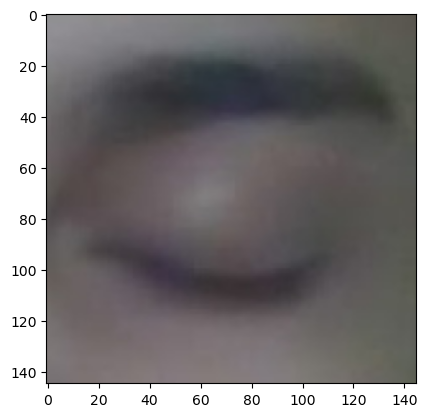

In [9]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"data\train\Closed\_3.jpg"))


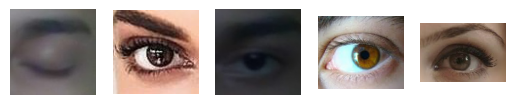

In [10]:
import matplotlib.pyplot as plt

# Load and display multiple images
image_paths = [r"data\train\Closed\_3.jpg", r"data\train\Open\_1.jpg", r"data\train\Open\_2.jpg", r"data\train\Open\_10.jpg",r"data\train\Open\_20.jpg"]

num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images)

for i, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

## Create  and show Image array

In [11]:
a = plt.imread(r"data\train\yawn\10.jpg")

## Image shape

In [12]:
a.shape

(480, 640, 3)

## Display the image of a yawning face without the background, using the array representation of the face image. 


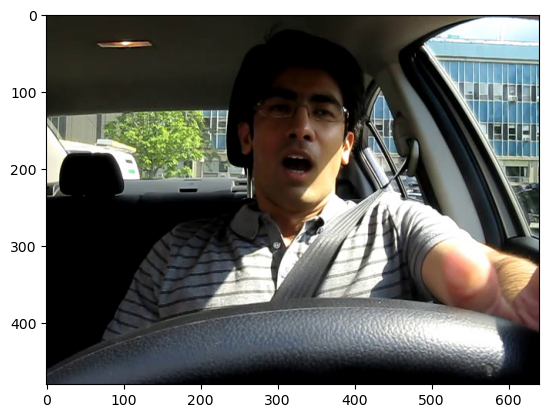

In [13]:
plt.imshow(plt.imread(r"data\train\yawn\59.jpg"))

## Extract only the face region from both yawn and not_yawn images.

In [14]:
def face_for_yawn(direc=r"data\\train", face_cas_path=r"haarcascade\\haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


## For Closed and Open eye

In [15]:
def get_data(dir_path=r"data\\train", face_cas=r"haarcascade\\haarcascade_frontalface_default.xml", eye_cas=r"haarcascade\\haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [16]:
data_train = get_data()

2
3


## Expand the dataset by adding more data and convert the data into an array format.

In [17]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

## New variable to store

In [18]:
new_data = append_data()

0
1
2
3


C:\Users\kamal\AppData\Local\Temp\ipykernel_10364\2804427426.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


## Separate the labels and features in the dataset

In [19]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

## Reshape images X

In [20]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

## Perform label binarization.

In [21]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

## Label array

In [22]:
y = np.array(y)

In [23]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## Train Test split

In [24]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

## Length of X_test

In [25]:
len(X_test)

578

## Import some dependencies

In [26]:
from tensorflow.python.keras.layers import Lambda, Dropout
from tensorflow.python.keras.layers.advanced_activations import ELU, LeakyReLU, ReLU
from tensorflow.python.keras import activations
from keras import callbacks, layers, metrics, regularizers
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from tensorflow import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation


In [27]:

import numpy as np

## Data Augmentation

In [28]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Build a Model

In [29]:
model = keras.models.Sequential()

model.add(Conv2D(filters= 256, kernel_size=(3, 3), activation="relu", input_shape=(145,145,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 128, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 64, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))

model.build(input_shape=(None, 145, 145, 3))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 143, 143, 256)     1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 69, 69, 128)       512       
 chNormalization)                                                
                                                        

In [30]:
# %% Plot the model
keras.utils.plot_model(
    model, "figs/ModelArchitecture.png",)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/10
43/43 [==============================] - 176s 4s/step - loss: 0.7660 - accuracy: 0.7379 - val_loss: 1.3650 - val_accuracy: 0.3772
Epoch 2/10
43/43 [==============================] - 164s 4s/step - loss: 0.4182 - accuracy: 0.8426 - val_loss: 1.1111 - val_accuracy: 0.5588
Epoch 3/10
43/43 [==============================] - 162s 4s/step - loss: 0.4107 - accuracy: 0.8434 - val_loss: 0.9240 - val_accuracy: 0.6073
Epoch 4/10
43/43 [==============================] - 158s 4s/step - loss: 0.2874 - accuracy: 0.8812 - val_loss: 1.1122 - val_accuracy: 0.5692
Epoch 5/10
43/43 [==============================] - 161s 4s/step - loss: 0.2582 - accuracy: 0.8924 - val_loss: 1.7575 - val_accuracy: 0.3927
Epoch 6/10
43/43 [==============================] - 189s 4s/step - loss: 0.2907 - accuracy: 0.8842 - val_loss: 1.4211 - val_accuracy: 0.5346
Epoch 7/10
43/43 [==============================] - 188s 4s/step - loss: 0.2373 - accuracy: 0.9050 - val_loss: 1.7957 - val_accuracy: 0.4619
Epoch 8/10
43

In [32]:
# Add Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', mode='min', patience=5, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    'model_best.h5', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [early_stopping, mcp_save]

# Train model

In [33]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/10
43/43 [==============================] - 175s 4s/step - loss: 0.2287 - accuracy: 0.9102 - val_loss: 0.4408 - val_accuracy: 0.8581


c:\Users\kamal\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
43/43 [==============================] - 161s 4s/step - loss: 0.2203 - accuracy: 0.9117 - val_loss: 0.9233 - val_accuracy: 0.7595
Epoch 3/10
43/43 [==============================] - 162s 4s/step - loss: 0.2400 - accuracy: 0.9094 - val_loss: 0.5108 - val_accuracy: 0.8495
Epoch 4/10
43/43 [==============================] - 160s 4s/step - loss: 0.1720 - accuracy: 0.9258 - val_loss: 0.2693 - val_accuracy: 0.9014
Epoch 5/10
43/43 [==============================] - 181s 4s/step - loss: 0.1928 - accuracy: 0.9280 - val_loss: 0.2104 - val_accuracy: 0.9066
Epoch 6/10
43/43 [==============================] - 192s 4s/step - loss: 0.1715 - accuracy: 0.9280 - val_loss: 0.2361 - val_accuracy: 0.9377
Epoch 7/10
43/43 [==============================] - 207s 5s/step - loss: 0.2059 - accuracy: 0.9213 - val_loss: 0.3012 - val_accuracy: 0.9031
Epoch 8/10
43/43 [==============================] - 166s 4s/step - loss: 0.1612 - accuracy: 0.9265 - val_loss: 0.1801 - val_accuracy: 0.9325
Epoch 9/10
43

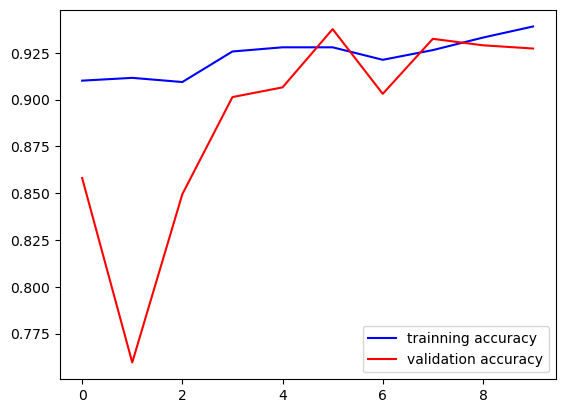

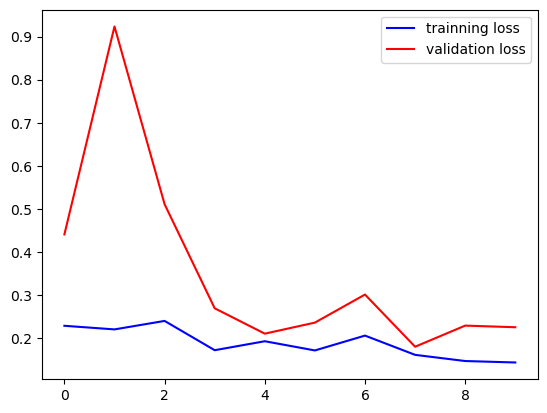

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [35]:
model.save("drowiness_new.h5")

In [36]:
model.save("drowiness_new.model")

INFO:tensorflow:Assets written to: drowiness_new.model\assets


INFO:tensorflow:Assets written to: drowiness_new.model\assets


## History

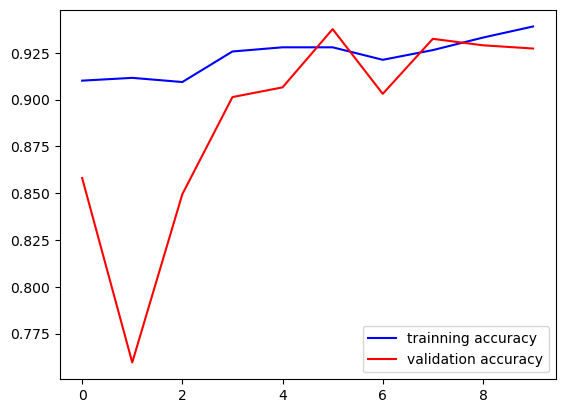

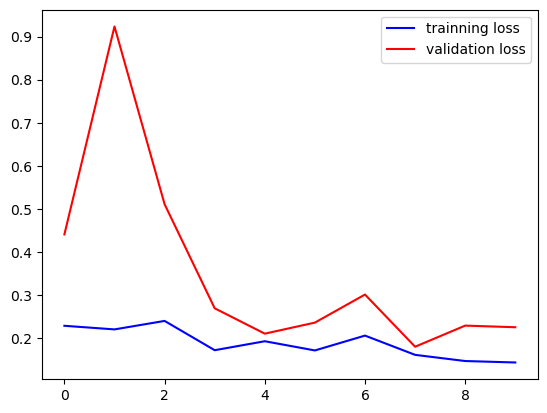

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

## Save Model

In [38]:
model.save("drowiness_new2.h5")

c:\Users\kamal\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
model.save("drowiness_new2.model")

INFO:tensorflow:Assets written to: drowiness_new2.model\assets


INFO:tensorflow:Assets written to: drowiness_new2.model\assets


# Prediction

In [40]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

19/19 [==============================] - 15s 795ms/step


In [41]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,

# classification report

In [42]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [43]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.13      1.00      0.23        63
     no_yawn       0.00      0.00      0.00        74
      Closed       0.00      0.00      0.00       215
        Open       0.99      0.38      0.55       226

    accuracy                           0.26       578
   macro avg       0.28      0.35      0.19       578
weighted avg       0.40      0.26      0.24       578



c:\Users\kamal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kamal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kamal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# predicting function

In [44]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    try:
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
        img_array = img_array / 255
        resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    except Exception as e:
        print("Error occurred while reading the image file:", e)
        return None

model = tf.keras.models.load_model("./drowiness_new2.h5")

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [45]:
prediction = model.predict([prepare(r"data\train\Closed\_100.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 210ms/step


2

In [46]:
prediction = model.predict([prepare(r"data\train\Closed\_120.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 69ms/step


2

In [47]:
prediction = model.predict([prepare(r"data\train\yawn\12.jpg")])
np.argmax(prediction)


1/1 [==============================] - 0s 73ms/step


0